Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

experimental data

In [42]:
df_exp_data = pd.read_csv("single_mut_effects.csv")

In [43]:
binding_site =np.array( ['K417A', 'N439A', 'Y449A', 'Y453A', 'L455A', 'F456A',
       'F486A', 'N487A', 'Y489A', 'Q493A', 'S494A', 'Q498A',
       'T500A', 'N501A', 'V503A', 'Y505A'])

numerical data

In [54]:
df_num_data_mbondi = pd.read_csv("all_amino_pb_gb_gb66.csv", index_col=0)
#df_num_data_mbondi.describe()

In [53]:
num_muts = []
num_mut_sites = [] 
binding_site_idx = [] 
for mut in df_num_data_mbondi["mutations"].to_numpy():
    num_muts.append(mut.split("_")[0])
    num_mut_sites.append(int(mut.split("_")[0][1:-1])) #just get numerical value
sorting_idx = np.argsort(num_mut_sites)
num_muts = np.array(num_muts)[sorting_idx] #just sort by binding site 
for mut in binding_site : 
    binding_site_idx.append(np.where(num_muts == mut )[0] [0]) 


In [ ]:
exp_muts_np = df_exp_data["mutation"].to_numpy()
idx= []  
for mut in num_muts : 
    idx.append(np.where(exp_muts_np == mut )[0] [0]) 
if np.all(exp_muts_np[idx] == num_muts) == False :      #check here
    print("Error, mutations do not match") 

In [ ]:
relevant_exp_data = df_exp_data.iloc[idx]["bind_avg"].to_numpy()
R = 1.98*1e-3 #1e-3 for cal to kcal conversion 
T =298  #room temp  
K_D_app = 3.9*1e-11 #from paper 
delta_g_deg = R * T * np.log(K_D_app)
tmp_K_mut = 10**(relevant_exp_data) * K_D_app
delta_g_first_method = -R * T * np.log(tmp_K_mut)

del_del_g_total = - ( delta_g_deg + delta_g_first_method) 


copy and add column to numerical df to include experimental values

In [ ]:
df_num_data_mbondi_sorted= df_num_data_mbondi.iloc[sorting_idx].copy()
df_num_data_mbondi_sorted["exp_data"] = del_del_g_total

In [ ]:
df_num_data_mbondi_sorted.columns

Index(['mutations', 'delta_delta_g_gen', 'delta_delta_g_gen_error',
       'delta_delta_g_gen_66', 'delta_delta_g_gen_66_error',
       'delta_delta_g_pb', 'delta_delta_g_pb_error', 'exp_data'],
      dtype='object')

Text(0.5, 0, 'site')

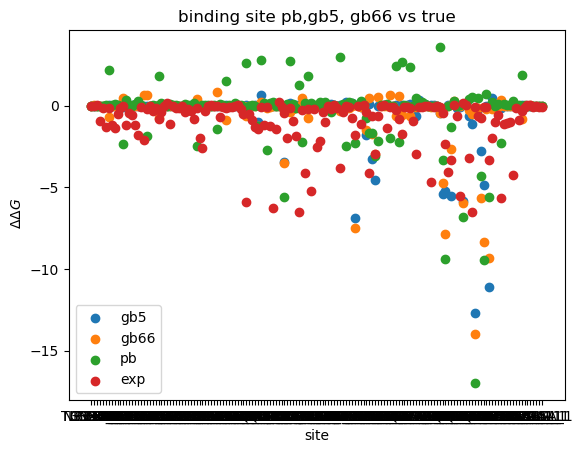

In [55]:
plt.scatter( df_num_data_mbondi_sorted["mutations"]
            ,df_num_data_mbondi_sorted["delta_delta_g_gen"], label="gb5")
plt.scatter( df_num_data_mbondi_sorted["mutations"]
            ,df_num_data_mbondi_sorted["delta_delta_g_gen_66"], label="gb66")
plt.scatter( df_num_data_mbondi_sorted["mutations"]
            ,df_num_data_mbondi_sorted["delta_delta_g_pb"], label="pb")
plt.scatter( df_num_data_mbondi_sorted["mutations"]
            ,df_num_data_mbondi_sorted["exp_data"], label="exp")
            
plt.legend()
plt.title("binding site pb,gb5, gb66 vs true")
plt.ylabel(" $\Delta \Delta G$")
plt.xlabel("site")